In [1]:
import torch
from d2l import torch as d2l

import pandas as pd

### Review

<b><span style="color:blue"> Saturation of gradients: </span><b/> It is a problem which affects sigmoid like activation functions. Saturated values are values of the activation function which approach asymptotes as the inputs of the function increase or decreases too much.
    
<b><span style="color:blue"> Vanishing of gradients: </span><b/> 

### 1. Sigmoid function

The sigmoid function is defined as:
    
$$
y = sigmoid(x) = \frac{1}{1+e^{-x}}
$$
    
where $x \in \mathbb{R}$ and $y \in (0,1)$.
    
In the early days of the neural networks, many researchers were interested on using threshold activation functions inspired by the fireing up activity of neurons MacCullogh and Pitts (1943). When the attention of the training methods turned into backpropagation, there was the need for functions which were easier to differentiate. The natural alternative to the threshold function was the sigmoid and tanh functions.
    
The main issue with sigmoid like activation functions is the problem of <span style="color:blue"> vanishing gradients </span>

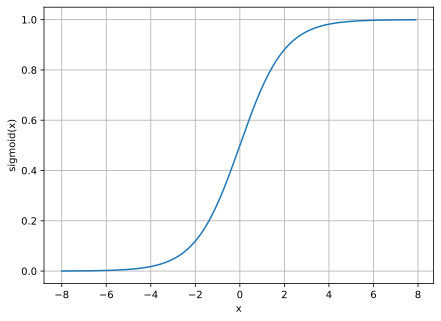

In [2]:
x = torch.arange(-8, 8, 0.1, requires_grad=True) # define the domin
y = torch.sigmoid(x)

d2l.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(7,5))

In [10]:
x.grad.data.zero_() # clear all previous grads
y.backward(torch.ones_like(x),retain_graph=True) # compute the gradient
x.grad # apply the domain values to the diffferentiated function

tensor([0.0003, 0.0004, 0.0004, 0.0005, 0.0005, 0.0006, 0.0006, 0.0007, 0.0007,
        0.0008, 0.0009, 0.0010, 0.0011, 0.0012, 0.0014, 0.0015, 0.0017, 0.0018,
        0.0020, 0.0022, 0.0025, 0.0027, 0.0030, 0.0033, 0.0037, 0.0041, 0.0045,
        0.0049, 0.0055, 0.0060, 0.0066, 0.0073, 0.0081, 0.0089, 0.0099, 0.0109,
        0.0120, 0.0132, 0.0146, 0.0160, 0.0177, 0.0194, 0.0214, 0.0235, 0.0259,
        0.0285, 0.0313, 0.0343, 0.0376, 0.0412, 0.0452, 0.0494, 0.0540, 0.0590,
        0.0644, 0.0701, 0.0763, 0.0828, 0.0898, 0.0972, 0.1050, 0.1132, 0.1217,
        0.1306, 0.1398, 0.1491, 0.1587, 0.1683, 0.1779, 0.1874, 0.1966, 0.2055,
        0.2139, 0.2217, 0.2288, 0.2350, 0.2403, 0.2445, 0.2475, 0.2494, 0.2500,
        0.2494, 0.2475, 0.2445, 0.2403, 0.2350, 0.2288, 0.2217, 0.2139, 0.2055,
        0.1966, 0.1874, 0.1779, 0.1683, 0.1587, 0.1491, 0.1398, 0.1306, 0.1217,
        0.1132, 0.1050, 0.0972, 0.0898, 0.0828, 0.0763, 0.0701, 0.0644, 0.0590,
        0.0540, 0.0494, 0.0452, 0.0412, 

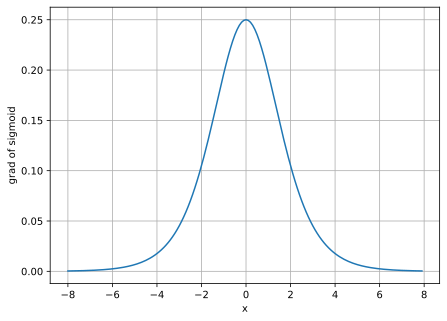

In [11]:
d2l.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(7,5))

### 2. Rectified linear unit (ReLU)

Proposed by Nair and Hinton (2010), the ReLU activation function is the most popular among ML engineers. This is the case because:

> 1) It has the best performance empirically among a variety of tasks
> 2) It avoids the <span style="color:blue"> saturation of gradients </span> problem 
> 3) It avoids the <span style="color:blue"> vanishing of gradients </span> problem
> 4) It avoids expensive operations for a computer such as $e$ and $tanh$
> 5) It induces some level of sparsity in the output

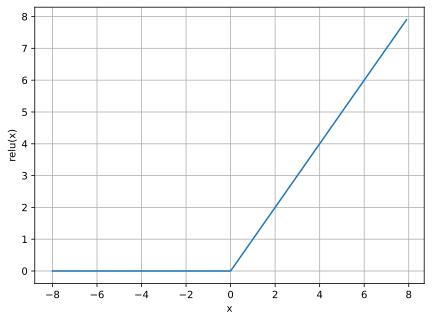

In [10]:
x = torch.arange(-8, 8, 0.1, requires_grad=True) # define the domin
y = torch.relu(x) # define the image

d2l.plot(x.detach(), y.detach(), 'x', 'relu(x)', figsize=(7, 5))

In [11]:
x.grad.data.zero_() # clear all previous grads
y.backward(torch.ones_like(x), retain_graph=True) # compute the gradient
x.grad # apply the domain values to the diffferentiated function

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

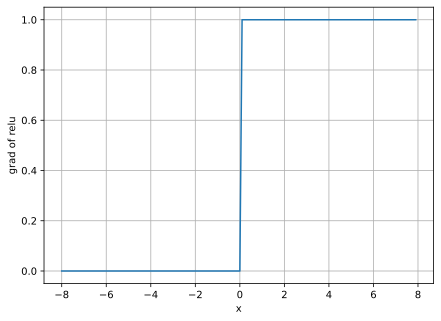

In [14]:
d2l.plot(x.detach(), x.grad.detach(), 'x', 'grad of relu', figsize=(7, 5))